**Lectura y Plotos para el data set**

300
35550
33450


(Text(0.5, 0, 'Cantidad de muestras'), Text(0, 0.5, 'mV'))

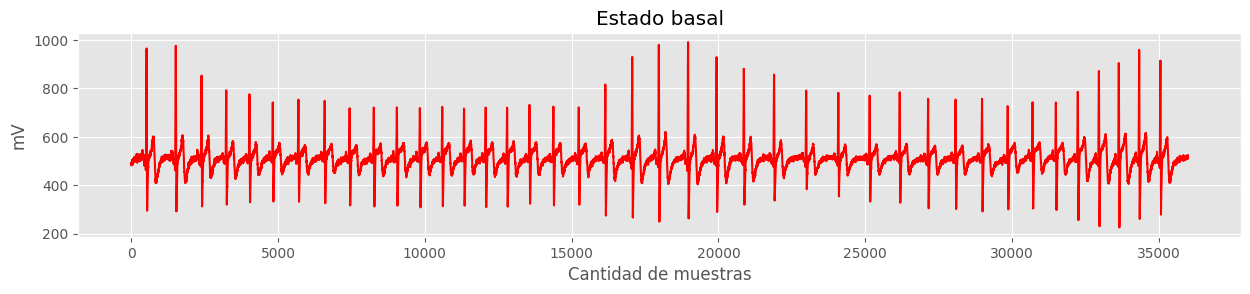

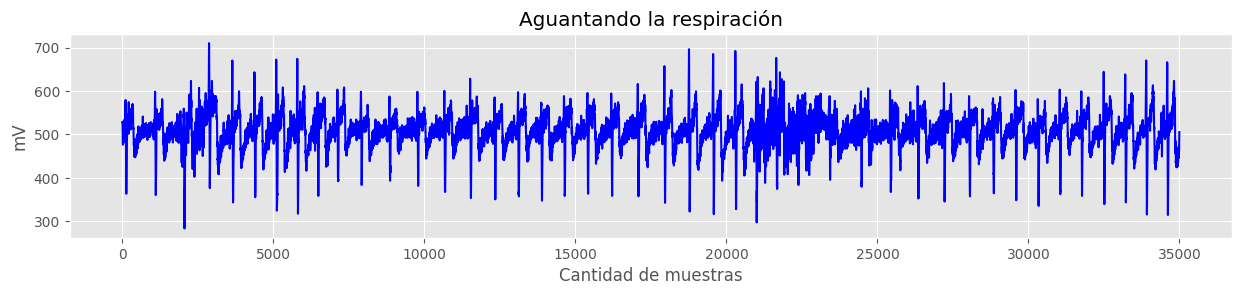

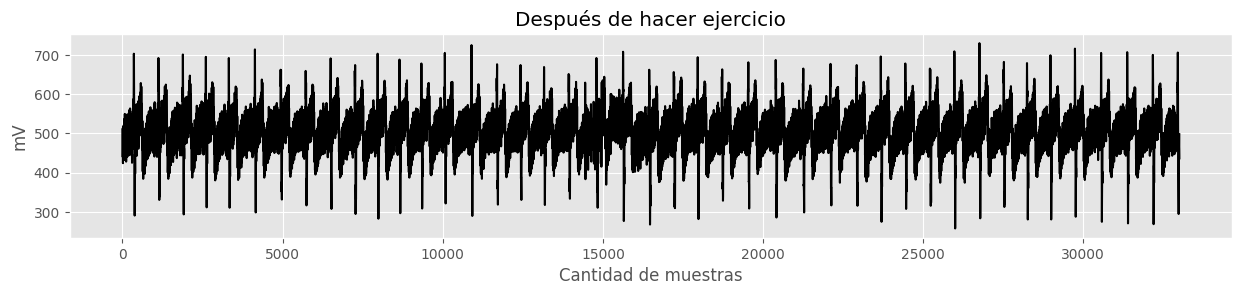

In [2]:
#Importación de librerías
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#Seleccionamos estilo de ploteo
plt.style.use("ggplot")

array_basal = np.genfromtxt("Senal5.txt", delimiter="\t")
array_Respiracion = np.genfromtxt("Senal2.txt", delimiter="\t")
array_ejercicio = np.genfromtxt("Senal3.txt", delimiter="\t")

d_sensor_basal= array_basal[:,-2]; print(len(d_sensor_basal)%1000)
d_sensor_respi = array_Respiracion[:,-2]; print(len(d_sensor_respi))
d_sensor_ejer = array_ejercicio[:,-2]; print(len(d_sensor_ejer))

d_sensor_basal = d_sensor_basal[300:]
d_sensor_respi = d_sensor_respi[550:]
d_sensor_ejer = d_sensor_ejer[450:]

plt.figure(figsize=(15, 9));plt.subplot(3,1,1);plt.plot(d_sensor_basal,'r');plt.title('Estado basal');plt.xlabel('Cantidad de muestras'), plt.ylabel('mV')
plt.figure(figsize=(15, 9));plt.subplot(3,1,2);plt.plot(d_sensor_respi,'b');plt.title('Aguantando la respiración');plt.xlabel('Cantidad de muestras'), plt.ylabel('mV')
plt.figure(figsize=(15, 9));plt.subplot(3,1,3);plt.plot(d_sensor_ejer,'k');plt.title('Después de hacer ejercicio');plt.xlabel('Cantidad de muestras'), plt.ylabel('mV')

(0.0, 5000.0)

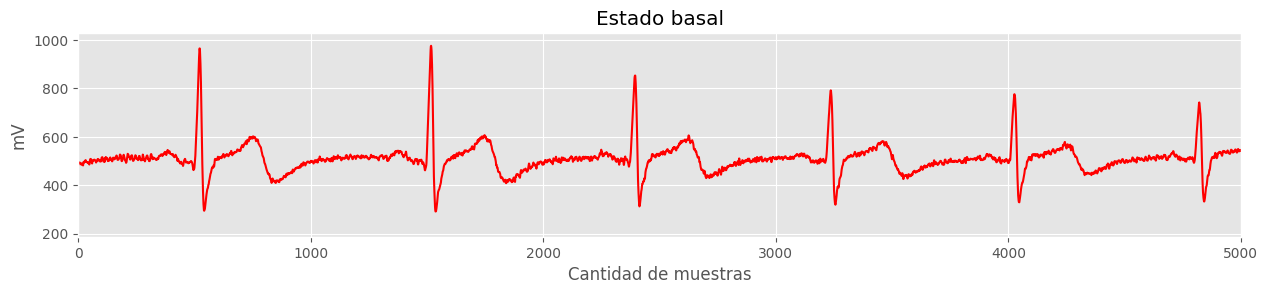

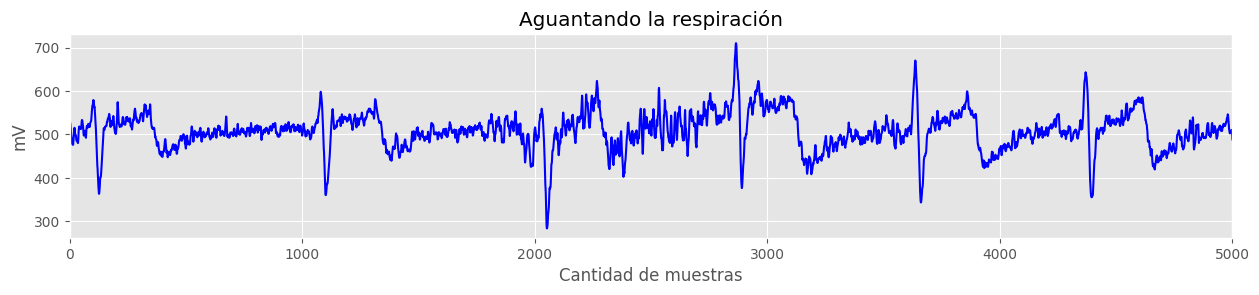

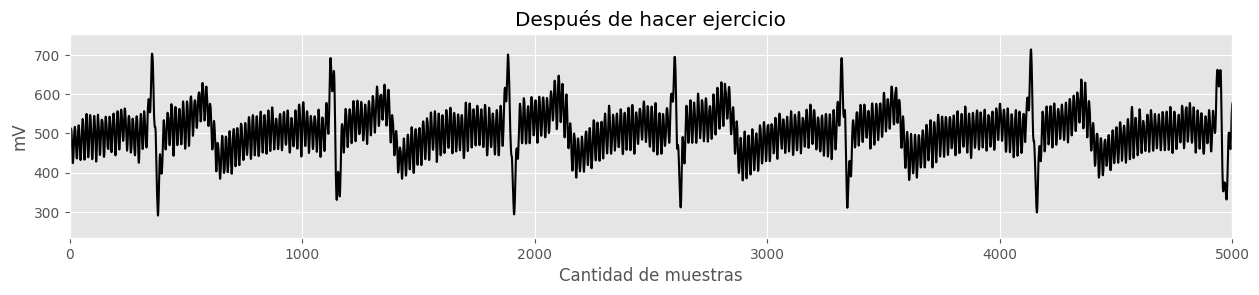

In [3]:
plt.figure(figsize=(15, 9));plt.subplot(3,1,1);plt.plot(d_sensor_basal,'r');plt.title('Estado basal');plt.xlabel('Cantidad de muestras'); plt.ylabel('mV');plt.xlim(0,5000)
plt.figure(figsize=(15, 9));plt.subplot(3,1,2);plt.plot(d_sensor_respi,'b');plt.title('Aguantando la respiración');plt.xlabel('Cantidad de muestras');plt.ylabel('mV');plt.xlim(0,5000)
plt.figure(figsize=(15, 9));plt.subplot(3,1,3);plt.plot(d_sensor_ejer,'k');plt.title('Después de hacer ejercicio');plt.xlabel('Cantidad de muestras');plt.ylabel('mV');plt.xlim(0,5000)

35000
33000


(Text(0.5, 0, 'Tiempo'), Text(0, 0.5, 'mV'))

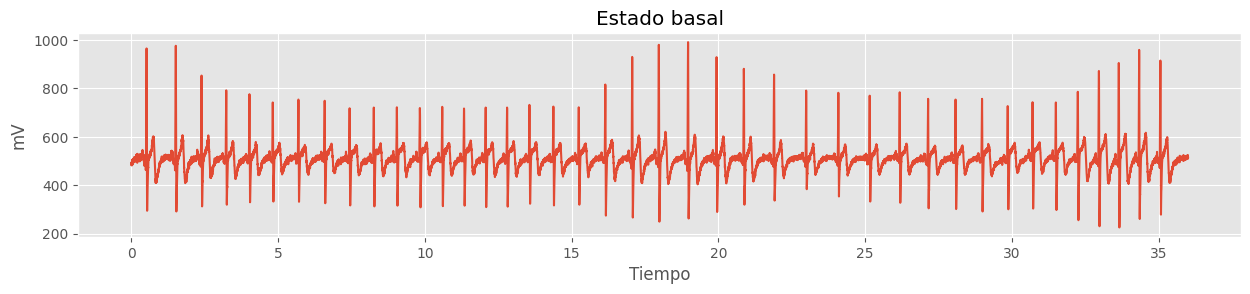

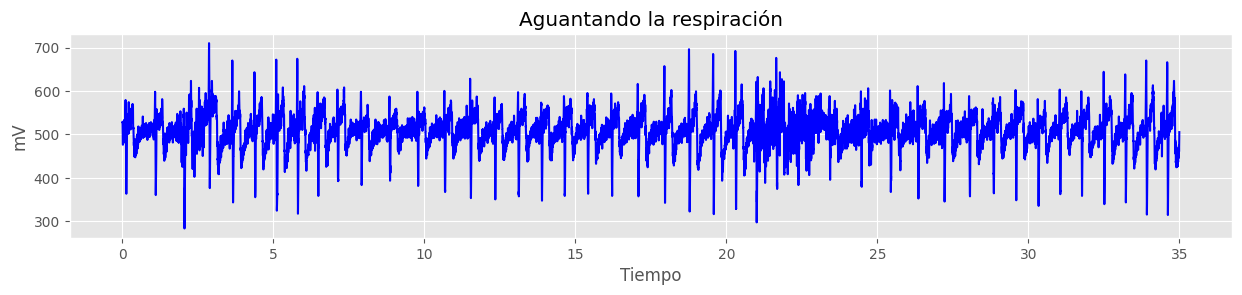

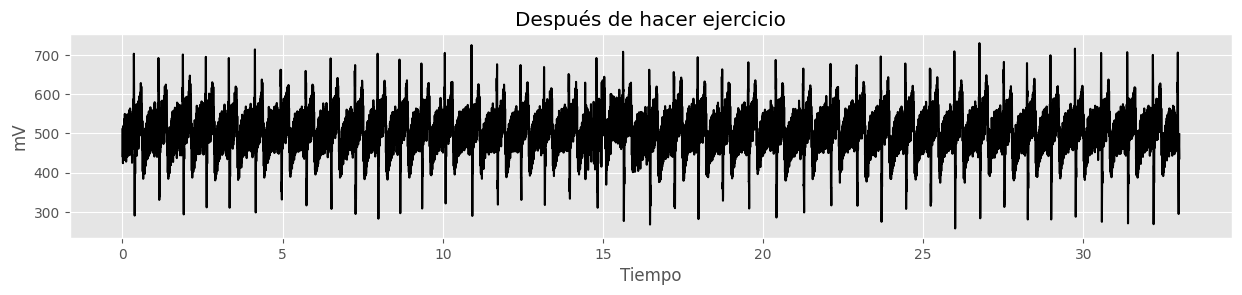

In [4]:
Fs = 1000 #Frecuencia de muestreo del dispositivo de adquisición
Ts=1/Fs

print(len(d_sensor_respi))
print(len(d_sensor_ejer))

#número de muestras para cada señal
n_b = np.arange(0,len(d_sensor_basal))  # t = n*Ts
n_r = np.arange(0,len(d_sensor_respi ))  
n_e = np.arange(0,len(d_sensor_ejer )) 

#tiempo de cada señal
t_b = n_b*Ts
t_r = n_r*Ts
t_e = n_e*Ts

#Ploteamos la señal en el tiempo
plt.figure(figsize=(15, 9));plt.subplot(3,1,1);plt.plot(t_b,d_sensor_basal);plt.title('Estado basal');plt.xlabel('Tiempo'), plt.ylabel('mV')
plt.figure(figsize=(15, 9));plt.subplot(3,1,2);plt.plot(t_r,d_sensor_respi,'b');plt.title('Aguantando la respiración');plt.xlabel('Tiempo'), plt.ylabel('mV')
plt.figure(figsize=(15, 9));plt.subplot(3,1,3);plt.plot(t_e,d_sensor_ejer,'k');plt.title('Después de hacer ejercicio');plt.xlabel('Tiempo'), plt.ylabel('mV')

(0.0, 2.0)

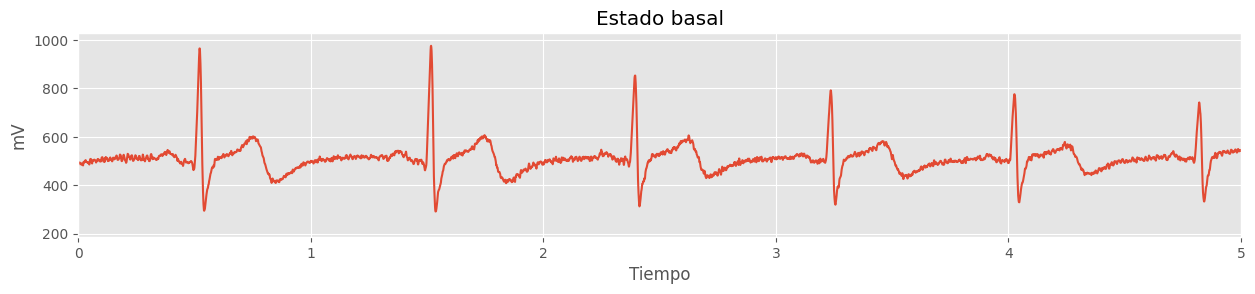

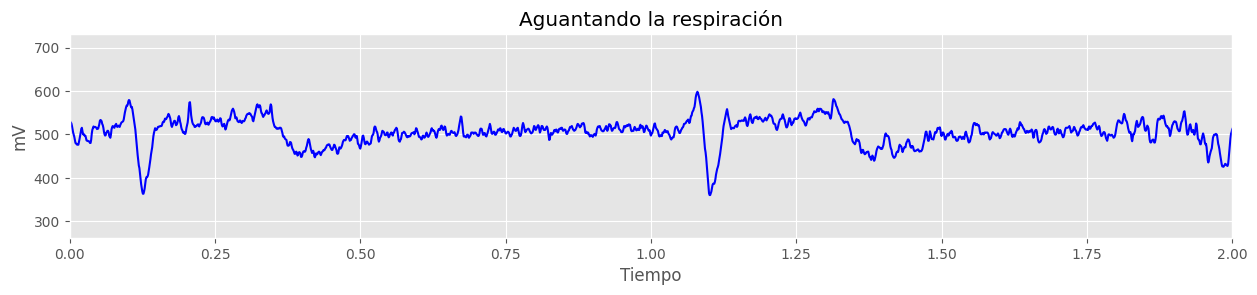

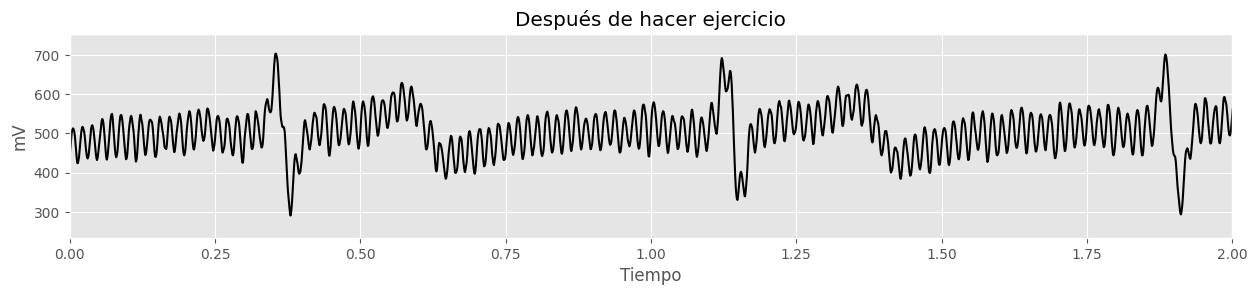

In [5]:
plt.figure(figsize=(15, 9));plt.subplot(3,1,1);plt.plot(t_b,d_sensor_basal);plt.title('Estado basal');plt.xlabel('Tiempo');plt.ylabel('mV');plt.xlim(0,5)
plt.figure(figsize=(15, 9));plt.subplot(3,1,2);plt.plot(t_r,d_sensor_respi,'b');plt.title('Aguantando la respiración');plt.xlabel('Tiempo'), plt.ylabel('mV');plt.xlim(0,2)
plt.figure(figsize=(15, 9));plt.subplot(3,1,3);plt.plot(t_e,d_sensor_ejer,'k');plt.title('Después de hacer ejercicio');plt.xlabel('Tiempo'), plt.ylabel('mV');plt.xlim(0,2)

In [6]:
# Pase de array para trabajar como series de tiempo
#Pasamos las observaciones a filas correspondientes a una variable t y d_sensor
st_sensor1 = np.concatenate((t_b.reshape(-1,1),  d_sensor_basal.reshape(-1,1)), axis=1)
st_sensor2 = np.concatenate((t_r.reshape(-1,1),  d_sensor_respi.reshape(-1,1)), axis=1)
st_sensor3 = np.concatenate((t_e.reshape(-1,1),  d_sensor_ejer.reshape(-1,1)), axis=1)


In [7]:
#Creamos el data frame con las varibles t y d_sensor
df1 = pd.DataFrame(st_sensor1, columns=["t","d_sensor1"])
df2 = pd.DataFrame(st_sensor2, columns=["t","d_sensor2"])
df3 = pd.DataFrame(st_sensor3, columns=["t","d_sensor3"])

#df4.head()

In [8]:
#Establecemos t como index 
df1 = df1.set_index("t")
df2 = df2.set_index("t")
df3 = df3.set_index("t")

#df2.head()

(0.0, 1.0)

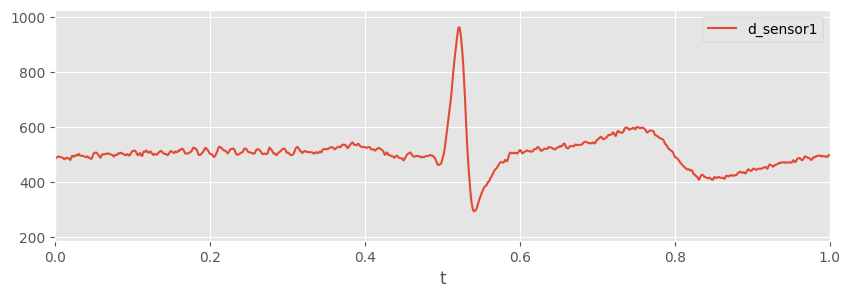

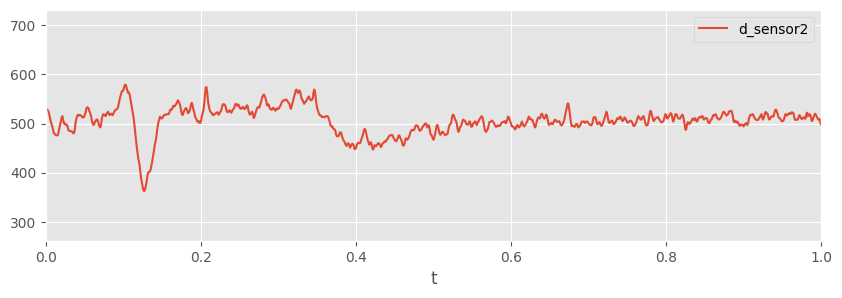

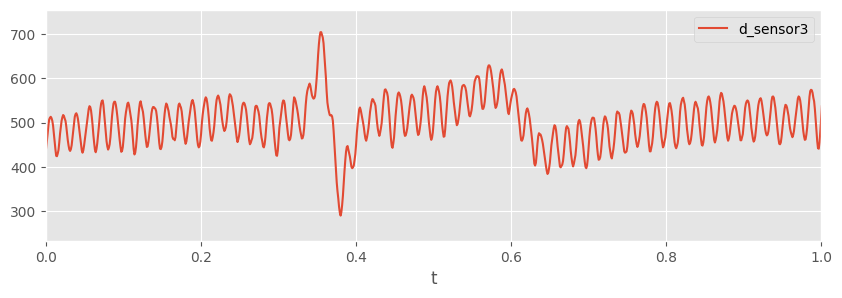

In [9]:
#Ploteamos la señal
df1.plot(figsize=(10,3))
plt.xlim(0,1)
#####plt.plot(df.index, df.loc[936])#######

df2.plot(figsize=(10,3))
plt.xlim(0,1)

df3.plot(figsize=(10,3))
plt.xlim(0,1)

In [10]:
# Pase a data tabular con el estilo Sklearn
n1=df1.index.max()/1
s1=df1.shape[0]/36
print(n1,s1)

n2=df2.index.max()/1
s2=df2.shape[0]/35
print(n2,s2)

n3=df3.index.max()/1
s3=df3.shape[0]/33
print(n3,s3)

35.999 1000.0
34.999 1000.0
32.999 1000.0


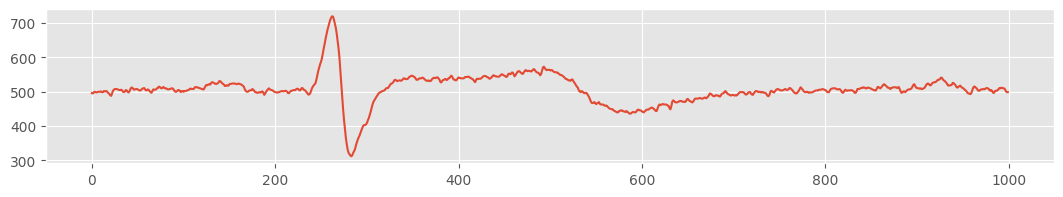

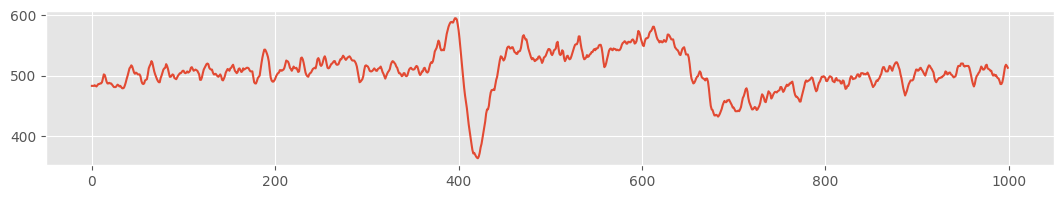

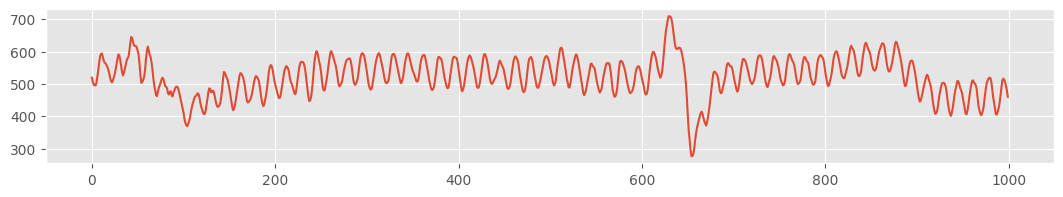

In [11]:

d_obs1 = df1[["d_sensor1"]].values.reshape(36,1000)
plt.figure(figsize=(13,2))
plt.plot(d_obs1[8])

d_obs2 = df2[["d_sensor2"]].values.reshape(35,1000)
plt.figure(figsize=(13,2))
plt.plot(d_obs2[15])

d_obs3 = df3[["d_sensor3"]].values.reshape(33,1000)
plt.figure(figsize=(13,2))
plt.plot(d_obs3[15])


In [12]:
target_1=np.repeat(0,d_obs1.shape[0])
target_2=np.repeat(1,d_obs1.shape[0])
target_3=np.repeat(2,d_obs1.shape[0])


ecg={"0":[d_obs1,target_1],"1":[d_obs2,target_2],"2":[d_obs3,target_3]}
ecg

{'0': [array([[485., 487., 488., ..., 493., 497., 499.],
         [498., 500., 500., ..., 486., 492., 493.],
         [490., 485., 487., ..., 510., 512., 515.],
         ...,
         [385., 392., 403., ..., 432., 431., 431.],
         [433., 432., 432., ..., 507., 504., 499.],
         [494., 491., 493., ..., 518., 517., 515.]]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])],
 '1': [array([[528., 529., 527., ..., 508., 509., 501.],
         [497., 501., 502., ..., 490., 501., 505.],
         [511., 514., 516., ..., 578., 578., 579.],
         ...,
         [552., 553., 556., ..., 541., 536., 528.],
         [523., 523., 519., ..., 529., 525., 523.],
         [524., 526., 527., ..., 491., 503., 505.]]),
  array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])],
 '2': [array([[442., 458., 475., ..., 441., 455., 480.],
         [510., 537